In [3]:
import pandas as pd
import re
import os

# 定义文件目录
directory = 'neural-collaborative-filtering/src/checkpoints'

# 获取目录中的所有文件名
files = os.listdir(directory)

# 正则表达式解析文件名
pattern = re.compile(r"(gmf|mlp|neumf)_.*_Epoch(\d+)_HR([\d.]+)_NDCG([\d.]+).model")

# 初始化三个列表
gmf_data = []
mlp_data = []
neumf_data = []

# 遍历文件名并解析
for file in files:
    match = pattern.match(file)
    if match:
        model_type = match.group(1)
        epoch = int(match.group(2))
        hr = float(match.group(3))
        ndcg = float(match.group(4))
        
        if model_type == "gmf":
            gmf_data.append((epoch, hr, ndcg))
        elif model_type == "mlp":
            mlp_data.append((epoch, hr, ndcg))
        elif model_type == "neumf":
            neumf_data.append((epoch, hr, ndcg))

# 创建 DataFrame
gmf_df = pd.DataFrame(gmf_data, columns=["Epoch", "HR", "NDCG"]).sort_values(by="Epoch").reset_index(drop=True)
mlp_df = pd.DataFrame(mlp_data, columns=["Epoch", "HR", "NDCG"]).sort_values(by="Epoch").reset_index(drop=True)
neumf_df = pd.DataFrame(neumf_data, columns=["Epoch", "HR", "NDCG"]).sort_values(by="Epoch").reset_index(drop=True)

# 显示结果
print("GMF DataFrame:")
print(gmf_df)
print("\nMLP DataFrame:")
print(mlp_df)
print("\nNeuMF DataFrame:")
print(neumf_df)


GMF DataFrame:
     Epoch      HR    NDCG
0        0  0.4623  0.2572
1        1  0.4790  0.2669
2        2  0.5118  0.2865
3        3  0.5492  0.3081
4        4  0.5765  0.3236
..     ...     ...     ...
195    195  0.6474  0.3710
196    196  0.6455  0.3704
197    197  0.6493  0.3727
198    198  0.6482  0.3730
199    199  0.6478  0.3709

[200 rows x 3 columns]

MLP DataFrame:
     Epoch      HR    NDCG
0        0  0.4477  0.2453
1        1  0.4848  0.2662
2        2  0.5359  0.2979
3        3  0.5800  0.3185
4        4  0.5916  0.3309
..     ...     ...     ...
195    195  0.6538  0.3813
196    196  0.6531  0.3801
197    197  0.6575  0.3835
198    198  0.6526  0.3812
199    199  0.6530  0.3803

[200 rows x 3 columns]

NeuMF DataFrame:
     Epoch      HR    NDCG
0        0  0.5275  0.2967
1        1  0.5839  0.3318
2        2  0.6167  0.3518
3        3  0.6293  0.3622
4        4  0.6392  0.3677
..     ...     ...     ...
195    195  0.6700  0.4047
196    196  0.6750  0.4054
197    197  

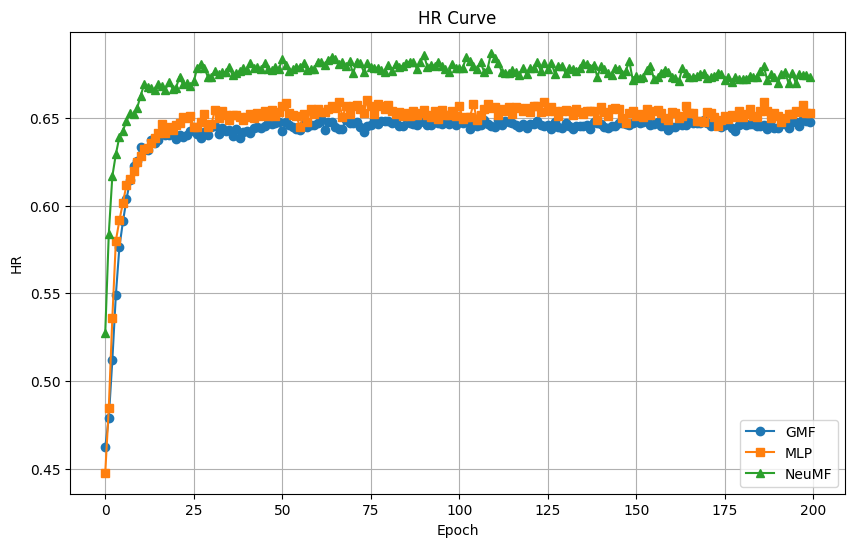

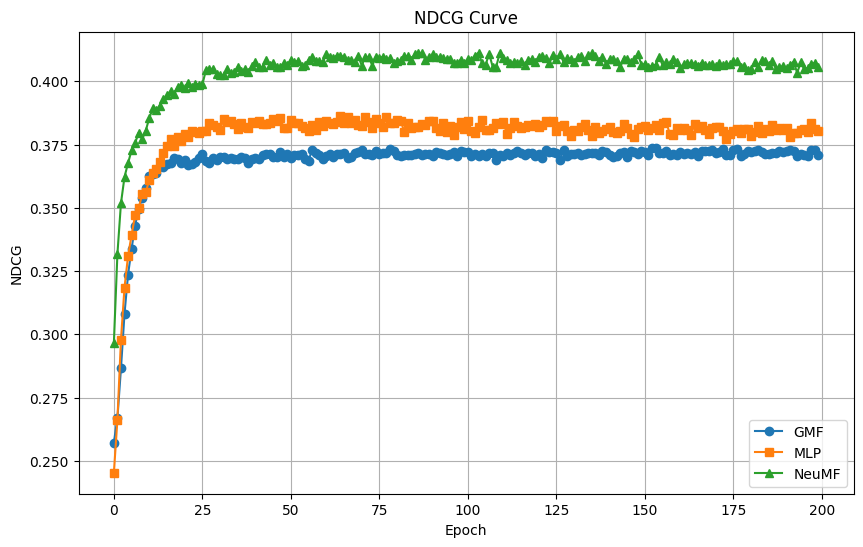

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# 假设你已经有了以下三个 DataFrame：gmf_df, mlp_df, neumf_df

# 创建第一个折线图 HR-Epoch
plt.figure(figsize=(10, 6))
plt.plot(gmf_df['Epoch'], gmf_df['HR'], label='GMF', marker='o')
plt.plot(mlp_df['Epoch'], mlp_df['HR'], label='MLP', marker='s')
plt.plot(neumf_df['Epoch'], neumf_df['HR'], label='NeuMF', marker='^')

plt.xlabel('Epoch')
plt.ylabel('HR')
plt.title('HR Curve')
plt.legend()
plt.grid(True)
plt.show()

# 创建第二个折线图 NDCG-Epoch
plt.figure(figsize=(10, 6))
plt.plot(gmf_df['Epoch'], gmf_df['NDCG'], label='GMF', marker='o')
plt.plot(mlp_df['Epoch'], mlp_df['NDCG'], label='MLP', marker='s')
plt.plot(neumf_df['Epoch'], neumf_df['NDCG'], label='NeuMF', marker='^')

plt.xlabel('Epoch')
plt.ylabel('NDCG')
plt.title('NDCG Curve')
plt.legend()
plt.grid(True)
plt.show()
